# 타이타닉 사망 생존 예측하기

### 데이터 로딩

In [2]:
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터 구조

- PassengerId : 승객Id. 1부터 시작해서 1씩 증가되는 값
- Survived : 생존여부. 0 - 사망 , 1 - 생존
- Pclass : 티켓 등급. 1- 1등석 , 2 - 2등석, 3 - 3등석
- Name : 승객이름
- Sex : 나이 
- Sibsp : 동승한 형제 자매의 수
- Parch : 동승한 부모 자식의 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 탑승한 선착장. C= Cherbourg, Q = Queenstown, S = Southampton

### 데이터 구조 확인하기

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- 결측: Age, Cabin, Embarked
- 문자열 : Name , Sex, Ticket, Cabin, Embarked

- 결측치를 채울것인지 아니면 빼고 진행할것인지 결정한다.
- 컬럼이 승객의 죽음에 영향을 끼치는지 판단후에 그 컬럼의 데이터를 활용할것인지 결정한다.
- 회귀에 관련된 데이터는 왜곡이 심하다 (나이) : 그룹으로 나누어 카테고리별로 나누는 방법도 존재한다.
- 반대로 성별같은 경우는 왜곡의 수치가 심하지 않다.(결측치를 임의로 채워도 괜찮다)
- 평균을 구하는 것이 아닌 예측정확도가 일정하고 비슷하게 유지되는 모델을 찾는다.
- 결과값이 반환된 후엔 최고값을 찾는게 아닌 시각화를 진행한다.

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


- 결측치 : Age, Fare, Cabin

### 데이터 분석화 및 시각화, 데이터 전처리

In [6]:
import matplotlib.pyplot as plt

In [7]:
# 생존자 수를 가져온다.
survived = train[train['Survived'] == 1]['Pclass'].value_counts()
dead = train[train['Survived'] == 0]['Pclass'].value_counts()
print(survived)
print(dead)

1    136
3    119
2     87
Name: Pclass, dtype: int64
3    372
2     97
1     80
Name: Pclass, dtype: int64


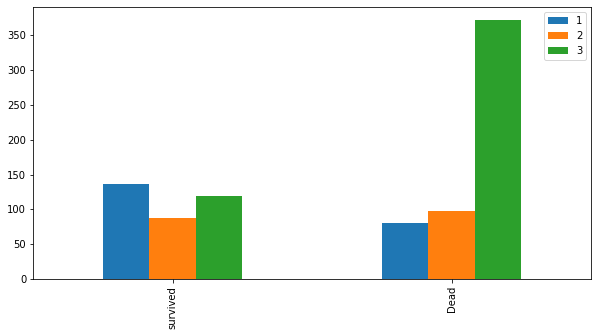

In [8]:
df = pd.DataFrame([survived, dead])
df.index = ['survived', 'Dead']
df.plot(kind='bar', figsize=(10, 5))

In [9]:
# 그래프 그리는 함수
def showChart(feature) :
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()

    df = pd.DataFrame([survived, dead])
    df.index = ['survived', 'Dead']
    df.plot(kind='bar', figsize=(10, 5))

In [10]:
# 결측치, 타입 정보를 출력하는 함수
def showInfo2(feature) :
    a1 = train[feature].isnull().sum()
    a2 = test[feature].isnull().sum()
    a3 = train[feature].dtype
    print(f'train 결측 : {a1}')
    print(f'test 결측 : {a2}')
    print(f'값의 타입 : {a3}')

### Pclass (티켓 등급)

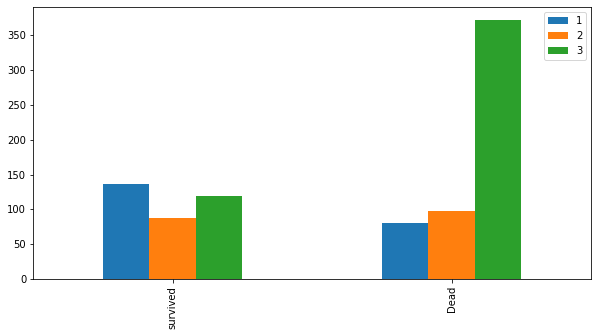

In [10]:
# 그래프 시각화
showChart('Pclass')

1등석일수록 생존확률이 높고, 3등석일수록 사망확률이 높다.


In [11]:
# 결측치 및 타입 확인
showInfo2('Pclass')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


결측치가 존재하지 않고 정수타입으로 되어 있으므로 전처리X

### Name

이름은 사망/생존과 관련이 없으므로 분석하지 않는다.

### Sex(성별)

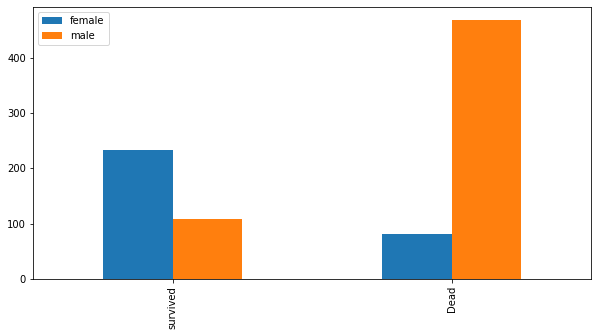

In [12]:
showChart('Sex')

남성일수록 사망확률이 높고, 여성일수록 생존확률이 높다.

In [13]:
# 결측치, 타입 확인
showInfo2('Sex')

train 결측 : 0
test 결측 : 0
값의 타입 : object


결측치는 없으나 값이 문자열로 되어있기 때문에 전처리가 필요하다.

In [14]:
map1 = {'male' : 0, 'female' : 1}
train['Sex'] = train['Sex'].map(map1)
test['Sex'] = test['Sex'].map(map1)

In [15]:
showInfo2('Sex')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


### Age 

- 나이 데이터의 종류가 너무 다양하여 시각화에 문제가 생긴다.
- 시각화를 하기 전, 전처리부터 먼저 한다.

In [16]:
showInfo2('Age')

train 결측 : 177
test 결측 : 86
값의 타입 : float64


결측치 처리를 위해 Mr. 등의 신분을 토대로 값을 추측한다.

In [17]:
# title을 추출한다
train_title = train['Name'].str.extract('([A-Za-z]+)\.', expand=False)
test_title = test['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [18]:
train_title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Countess      1
Ms            1
Capt          1
Jonkheer      1
Mme           1
Sir           1
Name: Name, dtype: int64

In [19]:
test_title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Ms          1
Dr          1
Name: Name, dtype: int64

In [20]:
# title을 숫자로 변경한다
map1 = {
    'Mr': 0, 'Miss' : 1, 'Mrs' : 2, 'Master': 3,
    'Dr' : 4, 'Rev' : 4, 'Major' : 4, 'Mile' : 4, 
    'Col' : 4, 'Ms': 4, 'Don': 4, 'Jonkheer' : 4,
    'Lady' : 4, 'Mme' : 4, 'Capt' : 4, 'Countess' : 4,
    'Sir' : 4, 'Dona' : 4
}
train['Title'] = train_title.map(map1)
test['Title'] = test_title.map(map1)

In [21]:
showInfo2('Title')

train 결측 : 2
test 결측 : 0
값의 타입 : float64


In [22]:
# Title을 기준으로 그룹으로 묶고 각 그룹별 나이의 결측치를 
# 결측치 들만 각 타이틀별 중간값으로 설정한다.
train['Age'].fillna(train.groupby('Title')['Age']
                    .transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age']
                    .transform('median'), inplace=True)


In [23]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값의 타입 : float64


In [24]:
# 나이를 나이대로 변경한다
# Loc : 인덱스로 데이터 접근이 가능한 함수
train.loc[train['Age'] <= 17, 'Age'] = 0
train.loc[(train['Age'] > 17) & (train['Age'] <= 45), 'Age'] = 1
train.loc[(train['Age'] > 45) & (train['Age'] <= 65), 'Age'] = 2
train.loc[train['Age'] > 65, 'Age'] =  3
train['Age'].value_counts()

1.0    670
0.0    117
2.0     96
3.0      8
Name: Age, dtype: int64

In [25]:
test.loc[test['Age'] <= 17, 'Age'] = 0
test.loc[(test['Age'] > 17) & (test['Age'] <= 45), 'Age'] = 1
test.loc[(test['Age'] > 45) & (test['Age'] <= 65), 'Age'] = 2
test.loc[test['Age'] > 65, 'Age'] =  3
test['Age'].value_counts()

1.0    321
2.0     50
0.0     45
3.0      2
Name: Age, dtype: int64

In [26]:
showInfo2('Age')

train 결측 : 0
test 결측 : 0
값의 타입 : float64


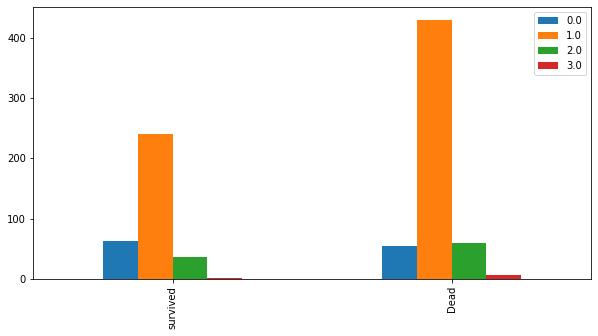

In [27]:
showChart('Age')

아이들은 생존확률이 높지만 그 이후 나이대에는 사망확률이 높아진다.

## SibSp, Parch (동승한 형제자매, 부모자식의 수)

SibSp, Parch, 본인을 합산해서 가족수로 만든다.

In [28]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 

In [29]:
showInfo2('FamilySize')

train 결측 : 0
test 결측 : 0
값의 타입 : int64


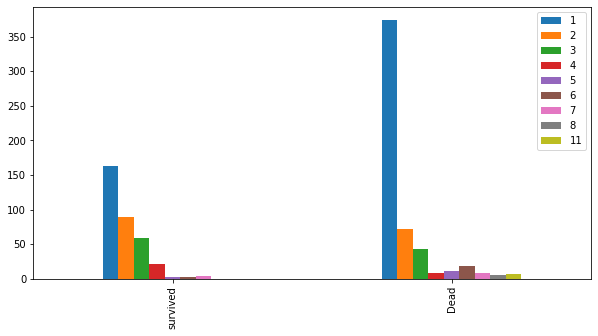

In [30]:
showChart('FamilySize')

혼자 탑승했을 경우 사망확률이 높다.

Fare(요금)

In [31]:
showInfo2('Fare')

train 결측 : 0
test 결측 : 1
값의 타입 : float64


In [32]:
# Pclass를 기준으로 그룹으로 묶은 후, 중간값을 세팅한다.
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [33]:
train.loc[train['Fare'] <= 17, 'Fare'] = 0
train.loc[(train['Fare'] > 17) & (train['Fare'] <= 30), 'Fare'] = 1
train.loc[(train['Fare'] > 30) & (train['Fare'] <= 100), 'Fare'] = 2
train.loc[train['Fare'] > 100, 'Fare'] =  3
train['Fare'].value_counts()

0.0    496
2.0    181
1.0    161
3.0     53
Name: Fare, dtype: int64

In [34]:
test.loc[test['Fare'] <= 17, 'Fare'] = 0
test.loc[(test['Fare'] > 17) & (test['Fare'] <= 30), 'Fare'] = 1
test.loc[(test['Fare'] > 30) & (test['Fare'] <= 100), 'Fare'] = 2
test.loc[test['Fare'] > 100, 'Fare'] =  3
test['Fare'].value_counts()

0.0    236
2.0     78
1.0     73
3.0     31
Name: Fare, dtype: int64

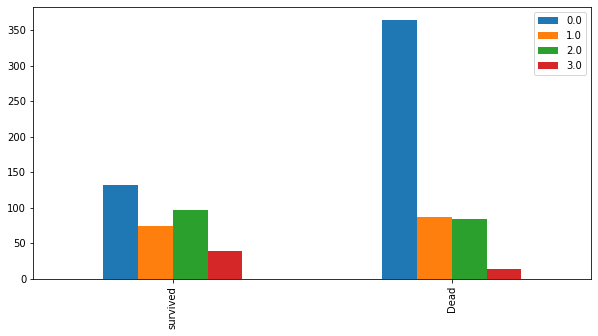

In [35]:
showChart('Fare')

요금이 저렴할수록 사망확률이 높다.

### 학습 준비

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        889 non-null    float64
 13  FamilySize   891 non-null    int64  
dtypes: float64(3), int64(7), object(4)
memory usage: 97.6+ KB


In [37]:
# 학습에 불필요한 데이터를 제거한다.
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 
             'Ticket', 'Cabin', 'Embarked', 'Title']   
train = train.drop(drop_list, axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


In [39]:
# 입력데이터와 결과 데이터로 나눈다.
X_train = train.drop(['Survived'], axis=1)
y_train = train['Survived']

### 학습

In [40]:
from sklearn.preprocessing import StandardScaler

s1 = StandardScaler()
s1.fit(X_train)
X_train = s1.transform(X_train)

In [41]:
# k 폴드 교차 검증 : 주어진 데이터를 랜덤하게 섞어서 80% 정도의 데이터를 추출한다.
# 그 후 주어진 모델을 학습하고 성능을 평가한다.
# 이러한 행위를 k 개 만큼 실행하여, 평가된 성능을 리스트로 반환한다.

from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifierl

In [42]:
# Fold 생성 : 데이터를 섞어서 가지고 있는 데이터 꾸러미
fold = KFold(n_splits=10, shuffle=True)


model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = DecisionTreeClassifier()
model4 = RandomForestClassifier()

score1 = cross_val_score(model1, X_train, y_train,
                        cv=fold, scoring='accuracy')
score2 = cross_val_score(model2, X_train, y_train,
                        cv=fold, scoring='accuracy')
score3 = cross_val_score(model3, X_train, y_train,
                        cv=fold, scoring='accuracy')
score4 = cross_val_score(model4, X_train, y_train,
                        cv=fold, scoring='accuracy')


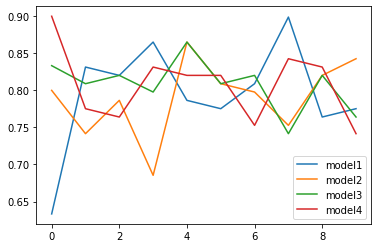

In [43]:
plt.plot(score1, label='model1')
plt.plot(score2, label='model2')
plt.plot(score3, label='model3')
plt.plot(score4, label='model4')
plt.legend()

In [44]:
# 학습한다.
model3.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
# 예측결과를 뽑는다.
PassengerId = test['PassengerId']
drop_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 
             'Ticket', 'Cabin', 'Embarked', 'Title']  

test = test.drop(drop_list, axis=1)

In [46]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         418 non-null    float64
 3   Fare        418 non-null    float64
 4   FamilySize  418 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 16.5 KB


In [47]:
X_test = s1.transform(test)
X_test

array([[ 0.82737724, -0.73769513,  0.0107022 , -0.78833764, -0.56097483],
       [ 0.82737724,  1.35557354,  1.91783388, -0.78833764,  0.05915988],
       [-0.36936484, -0.73769513,  1.91783388, -0.78833764, -0.56097483],
       ...,
       [ 0.82737724, -0.73769513,  0.0107022 , -0.78833764, -0.56097483],
       [ 0.82737724, -0.73769513,  0.0107022 , -0.78833764, -0.56097483],
       [ 0.82737724, -0.73769513, -1.89642948,  0.24158734,  0.67929458]])

In [48]:
y_pred = model3.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
result_df = pd.DataFrame({
    'PassengerId' : PassengerId,
    'Survived' : y_pred
})
# result_df.head()
result_df.to_csv('result.csv', index=False)

In [52]:
model3.score(X_train, y_train)

0.8451178451178452